In [1]:
# importing libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from cdlib import algorithms
#import os

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'bayanpy', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [2]:
# importing relationships file
relationship_df = pd.read_csv("relationships.csv")

In [3]:
relationship_df.head()

,source,target
0,France,Austria
1,Austria,Russia
2,Russia,Germany
3,Germany,Russia
4,Russia,Germany


In [4]:
# creating netweork object
G = nx.from_pandas_edgelist(relationship_df,source="source",target="target",create_using=nx.Graph())

In [5]:
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
list(G.nodes())

Nodes: 13
Edges: 32


['France',
 'Austria',
 'Russia',
 'Germany',
 'Italy',
 'Spain',
 'Poland',
 'Soviet Union',
 'Japan',
 'China',
 'India',
 'Hungary',
 'United States']

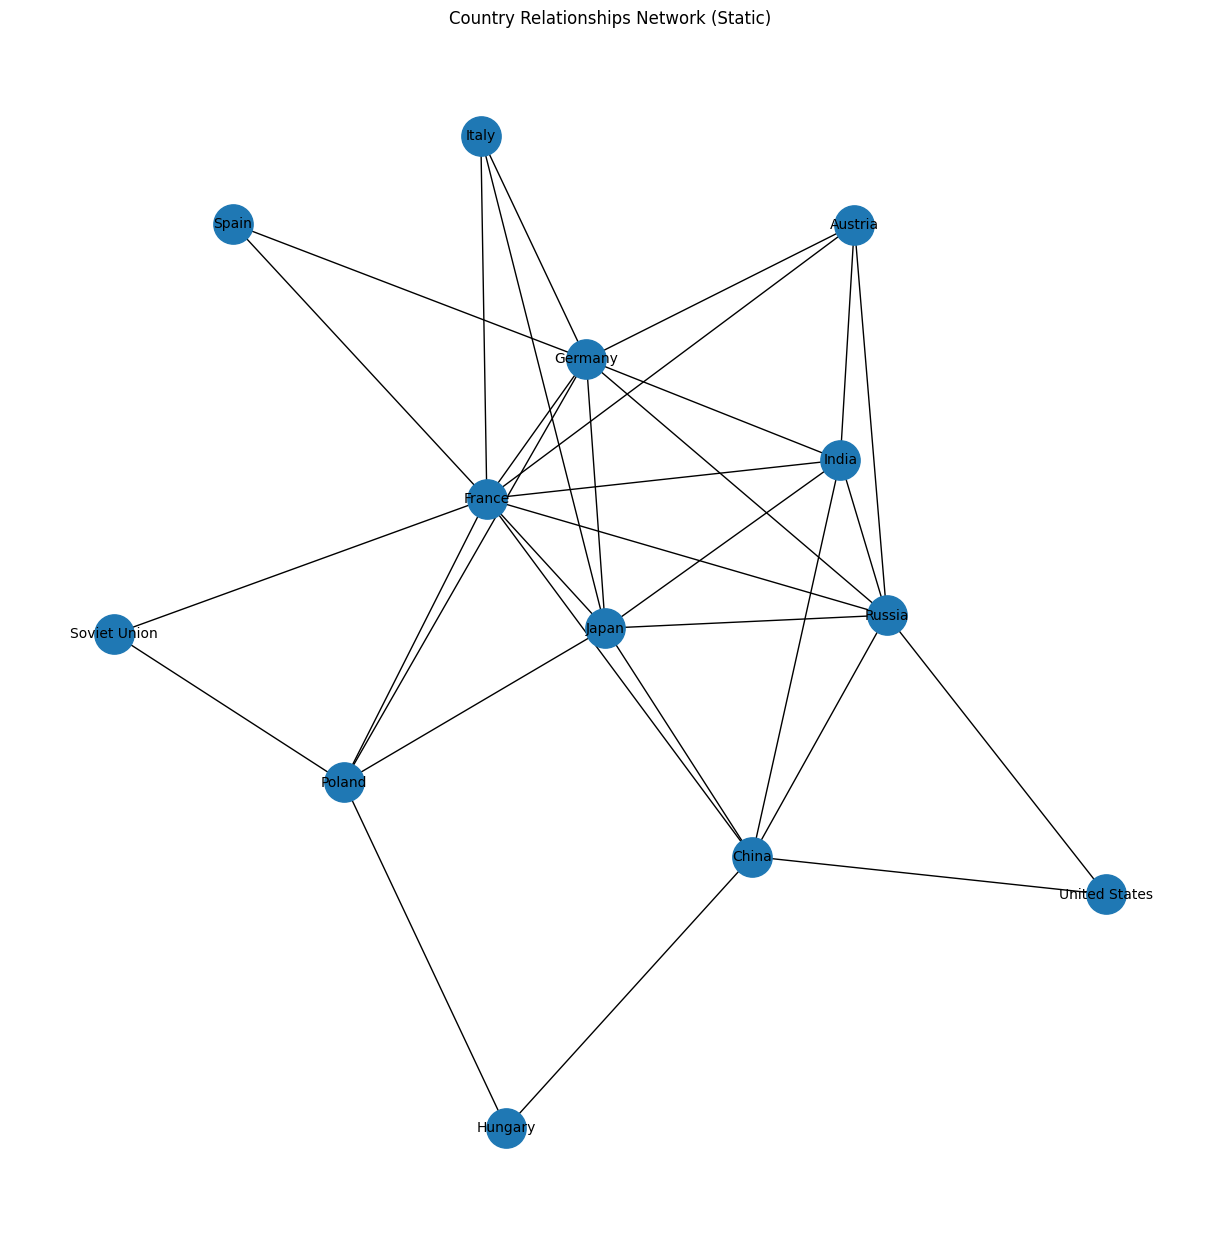

In [6]:
plt.figure(figsize=(12, 12))

pos = nx.kamada_kawai_layout(G)

nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_size=800,
    font_size=10
)

plt.title("Country Relationships Network (Static)")
plt.axis("off")
plt.show()

In [7]:
# Create PyVis network object
net = Network(notebook=True,width="1100px",height="750px",bgcolor="#222222",font_color="white")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [8]:
# Convert NetworkX graph -> PyVis graph
net.from_nx(G)

In [9]:
# Add controls + improve layout physics
net.show_buttons(filter_=True)
net.repulsion()

In [10]:
# Save as HTML
net.show("countries_network.html")

In [11]:
coms = algorithms.leiden(G)

In [12]:
coms

In [13]:
node_to_community_list = coms.to_node_community_map()

In [14]:
node_to_community_list


defaultdict(list,
            {'France': [0],
             'Germany': [0],
             'Italy': [0],
             'Spain': [0],
             'Poland': [0],
             'Soviet Union': [0],
             'Japan': [0],
             'Austria': [1],
             'Russia': [1],
             'China': [1],
             'India': [1],
             'Hungary': [1],
             'United States': [1]})

In [15]:
dict_com = {node: comms[0] for node, comms in node_to_community_list.items()}


In [16]:
dict_com

{'France': 0,
 'Germany': 0,
 'Italy': 0,
 'Spain': 0,
 'Poland': 0,
 'Soviet Union': 0,
 'Japan': 0,
 'Austria': 1,
 'Russia': 1,
 'China': 1,
 'India': 1,
 'Hungary': 1,
 'United States': 1}

In [17]:
from collections import defaultdict

communities = defaultdict(list)
for node, cid in dict_com.items():
    communities[cid].append(node)


In [18]:
print("Number of communities:", len(communities))

Number of communities: 2


In [19]:
for cid, members in communities.items():
    print(f"\nCommunity {cid} ({len(members)} countries):")
    print(sorted(members))


Community 0 (7 countries):
['France', 'Germany', 'Italy', 'Japan', 'Poland', 'Soviet Union', 'Spain']

Community 1 (6 countries):
['Austria', 'China', 'Hungary', 'India', 'Russia', 'United States']


In [20]:
nx.set_node_attributes(G, dict_com, "group")

com_net = Network(
    notebook=True,
    width="1100px",
    height="750px",
    bgcolor="#222222",
    font_color="white"
)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [24]:
com_net.from_nx(G)
com_net.show_buttons(filter_=True)
com_net.repulsion()

# Save to HTML
com_net.show("countries_communities.html")

# The partition broadly aligns with historical patterns, as countries with strong geopolitical interactions are grouped together. Major powers such as Germany, France, Russia, and Japan connect multiple communities, reflecting their involvement across different alliances. Overall, the network shows that twentieth-century international relations were highly interconnected rather than divided into isolated blocs.

In [21]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)

degree_df = pd.DataFrame(
    degree_centrality.items(),
    columns=["country", "degree_centrality"]
).sort_values("degree_centrality", ascending=False)

degree_df

,country,degree_centrality
0,France,0.833333
3,Germany,0.666667
2,Russia,0.583333
8,Japan,0.583333
9,China,0.500000
10,India,0.500000
6,Poland,0.416667
1,Austria,0.333333
4,Italy,0.250000
5,Spain,0.166667


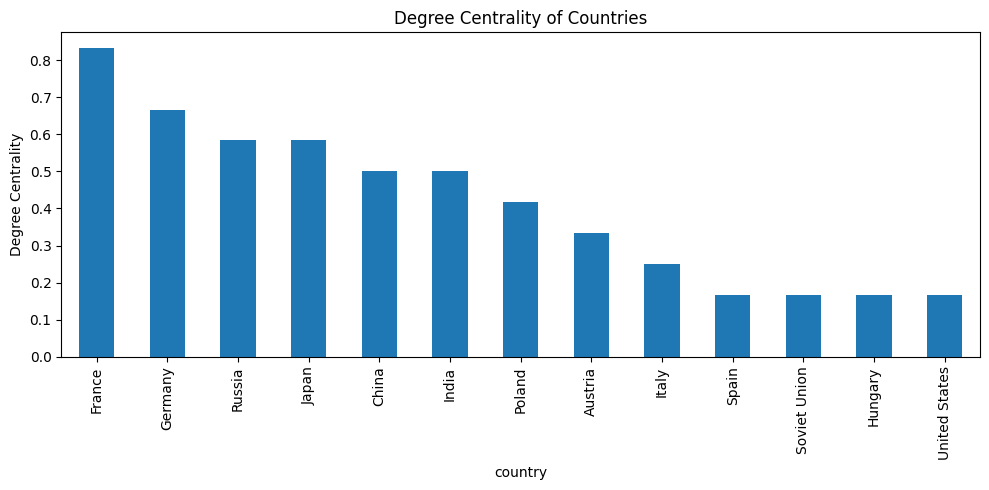

In [22]:
degree_df.plot(
    kind="bar",
    x="country",
    y="degree_centrality",
    legend=False,
    figsize=(10, 5)
)

plt.title("Degree Centrality of Countries")
plt.ylabel("Degree Centrality")
plt.tight_layout()
plt.show()


# The degree centrality results show that France has the highest number of connections in the network, indicating that it played a central role in twentieth-century international relations. Germany, Russia, and Japan also exhibit high degree centrality, suggesting strong involvement with multiple countries during this period. In contrast, countries such as Spain, Hungary, and the United States have lower degree centrality, reflecting fewer direct relationships in the dataset. Overall, the plot highlights a small number of highly connected countries that acted as key hubs in the network.